<a href="https://colab.research.google.com/github/vaishnaviS302004/machine-learning-lab/blob/main/p6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

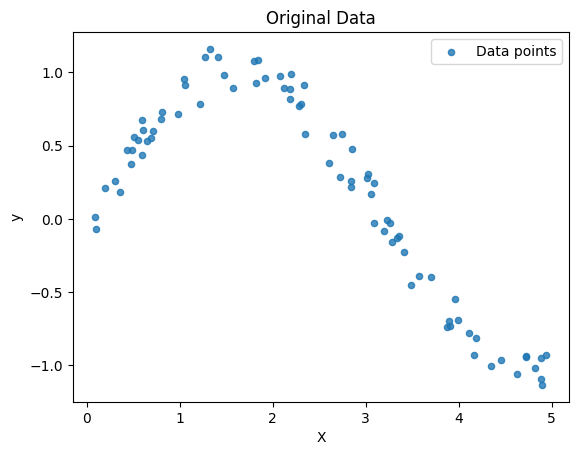

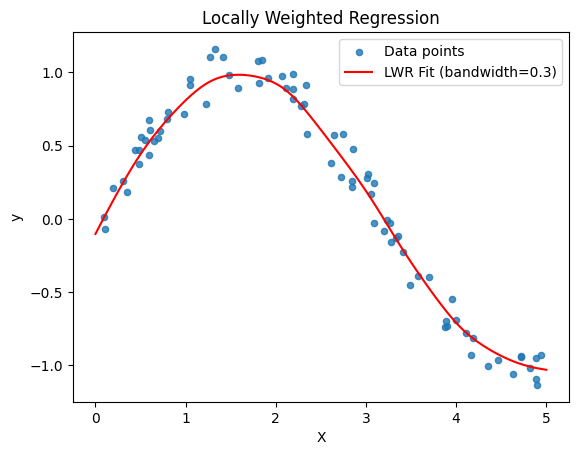

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 1. Choose and Load a Dataset:
# Generate some non-linear synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Reshape y for compatibility with LWR function
y = y.reshape(-1, 1)

# Plot the original data
plt.scatter(X, y, s=20, alpha=0.8, label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Original Data')
plt.legend()
plt.show()

# 2. Implement the Kernel Function:
def gaussian_kernel(distance, bandwidth):
  """
  Gaussian kernel function.

  Args:
    distance: The distance between two points.
    bandwidth: The bandwidth parameter controlling the kernel width.

  Returns:
    The weight assigned by the kernel.
  """
  return np.exp(-(distance**2) / (2 * bandwidth**2))

# 3. Implement the LWR Prediction Function:
def locally_weighted_regression(X_train, y_train, x_test, bandwidth):
  """
  Performs Locally Weighted Regression for a single test point.

  Args:
    X_train: Training data features.
    y_train: Training data target.
    x_test: The point for which to make a prediction.
    bandwidth: The bandwidth parameter for the kernel.

  Returns:
    The predicted value for x_test.
  """
  m = X_train.shape[0]
  weights = np.zeros(m)

  # Calculate weights for each training point
  for i in range(m):
    distance = np.linalg.norm(X_train[i] - x_test)
    weights[i] = gaussian_kernel(distance, bandwidth)

  # Build the weighted design matrix and weighted target vector
  W = np.diag(weights)
  X_design = np.hstack([np.ones((m, 1)), X_train])  # Add a column of ones for the intercept
  y_weighted = W @ y_train

  # Solve for the regression coefficients using weighted least squares
  # Handle potential singularity issues by adding a small value to the diagonal
  XTWX = X_design.T @ W @ X_design
  try:
    beta = np.linalg.solve(XTWX + 1e-5 * np.eye(XTWX.shape[0]), X_design.T @ y_weighted)
  except np.linalg.LinAlgError:
    # If singular matrix still occurs, you might need to adjust bandwidth or data
    print("Warning: Singular matrix encountered. Adjust bandwidth or data.")
    return np.nan # Return Not a Number in case of failure


  # Make the prediction for the test point
  x_test_design = np.array([1, x_test.flatten()[0]]).reshape(1, -1)
  prediction = x_test_design @ beta

  return prediction[0][0]

# 4. Apply LWR and Visualize Results:
# Generate test points for prediction
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = np.zeros(X_test.shape[0])

# Set the bandwidth parameter
bandwidth = 0.3

# Make predictions using LWR
for i in range(X_test.shape[0]):
  y_pred[i] = locally_weighted_regression(X, y, X_test[i], bandwidth)

# Plot the original data and the LWR fit
plt.scatter(X, y, s=20, alpha=0.8, label='Data points')
plt.plot(X_test, y_pred, color='red', label='LWR Fit (bandwidth={})'.format(bandwidth))
plt.xlabel('X')
plt.ylabel('y')
plt.title('Locally Weighted Regression')
plt.legend()
plt.show()